In [1]:
# Import libraries and dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Adjust pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent truncation

#import data for assignment
df = pd.read_csv('/Users/joezhou/Downloads/bank-additional-full.csv',sep=";")

In [5]:
# 2. Data collection and preparation: Collect and prepare the necessary data for analysis. 

# View the data
df.head().T
# the output is aligned to the variable list provided in the assingnment file "bank-additional_names.txt"

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [2]:
# 2. Data collection and preparation: Collect and prepare the necessary data for analysis. 

# What challenges can you identify in this dataset?
df.info()

#This is used to understand the data types, later we will convert interger to float as this allows for more precise calculations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

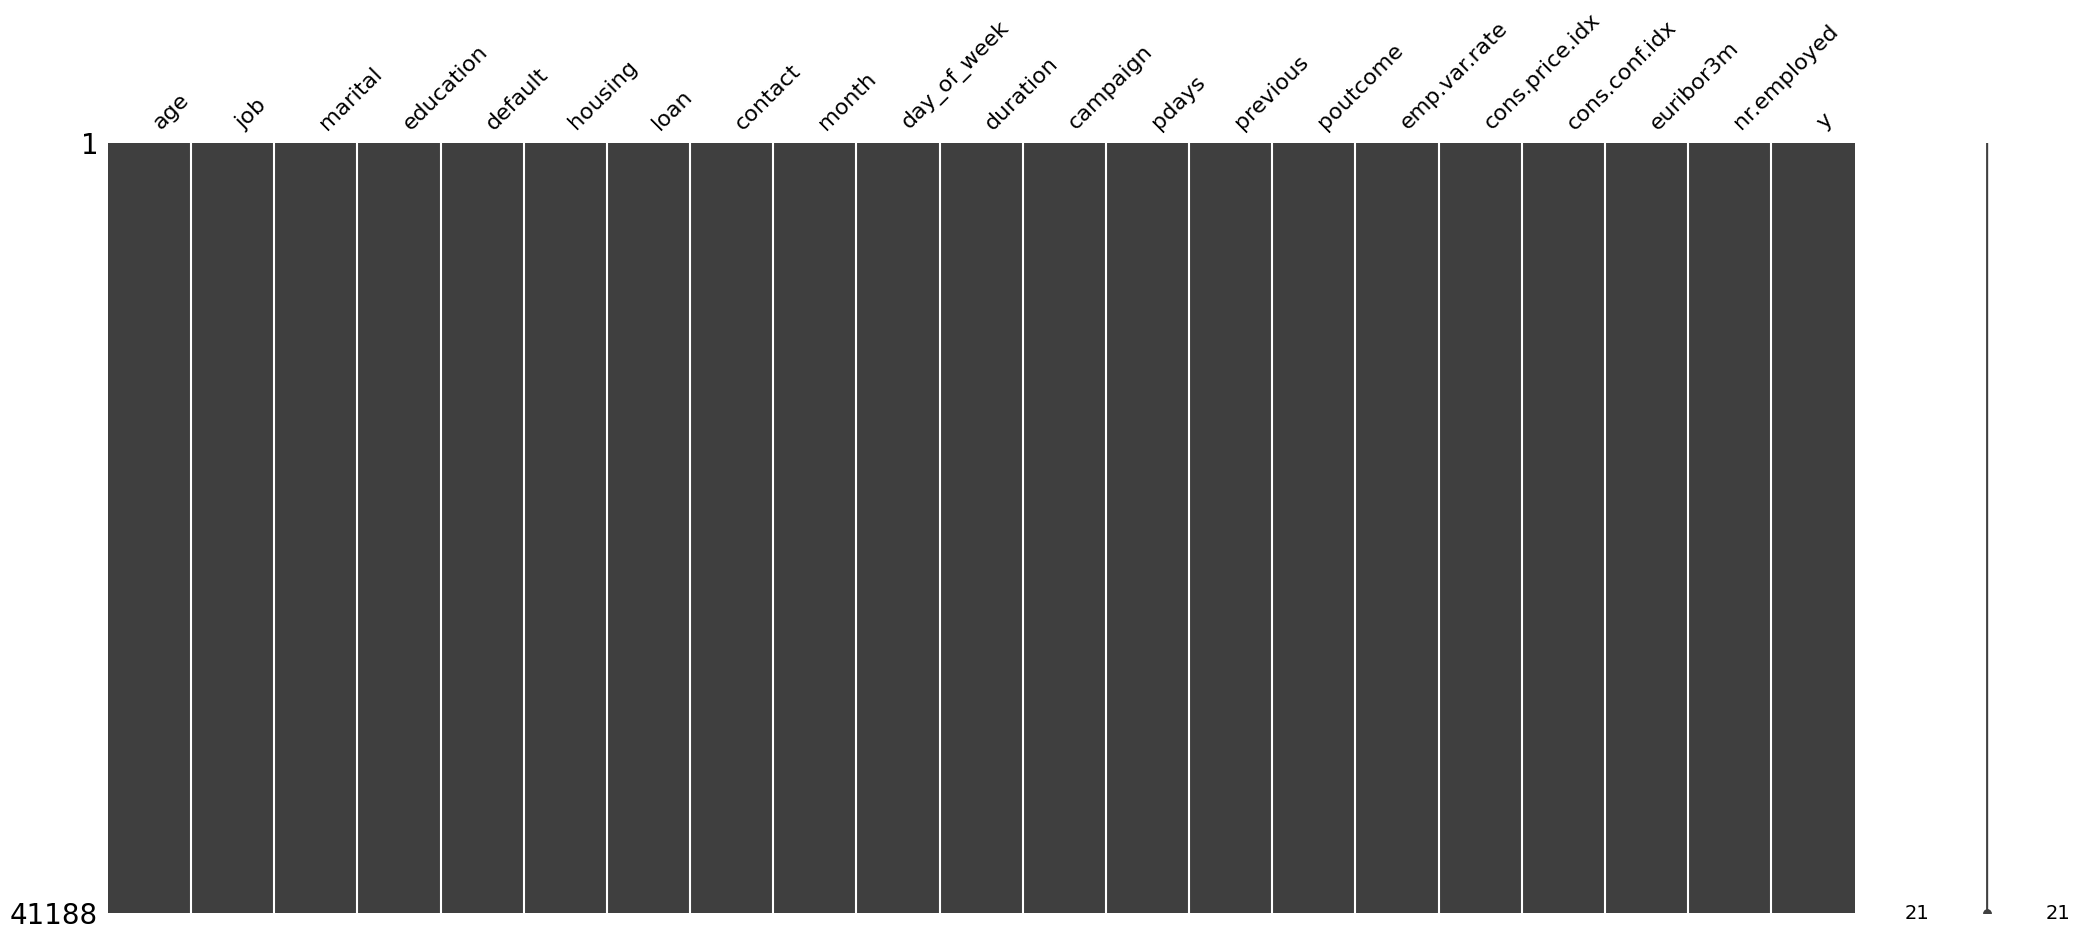

In [6]:
# 2. Data collection and preparation: Collect and prepare the necessary data for analysis. 

#Exploring missingness

# count the number of missing records
df.isna().sum()

# pip install missingno

import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# Visualise the missingness pattern

# msno.matrix(df): This is a missingness matrix and it provides a quick visual summary of the completeness of the dataset. 
# Each column corresponds to a variable in your dataset and each row corresponds to an observation.  The white lines indicate missing values. 
# If the white lines are randomly distributed, it suggests that data are Missing Completely at Random (MCAR). 
# If there are systematic patterns to the white lines, it suggests the data are either Missing at Random (MAR) or Missing Not at Random (MNAR).

msno.matrix(df)
plt.show()

# msno.heatmap(df): This generates a heatmap indicating the correlation of missingness between every two columns. 
# A correlation value near -1 means if one variable appears then the other variable is very likely to be missing. 
# A correlation value near 0 indicates no dependency and a correlation near 1 indicates a strong positive dependency.

# msno.heatmap(df)
# plt.show()

# msno.dendrogram(df): This creates a dendrogram (tree diagram) to show the hierarchical relationship of missingness between the variables. 
# The dendrogram uses a hierarchical clustering algorithm (which measures distance between clusters) to bin variables against one another by their nullity correlation (measured in terms of binary distance). 
# At each step of the clustering process, the two clusters that are most similar are combined into a single new cluster. 
# The height of each node in the dendrogram indicates the distance between clusters, with greater heights indicating larger distances. 
# In the context of missing data, this can help identify variables that tend to have missing or non-missing values under similar conditions.

# msno.dendrogram(df)
# plt.show()

In [3]:
# 2. Data collection and preparation: Collect and prepare the necessary data for analysis. 

# Calculate basic statistical measures such as mean, median, mode, and percentiles for each attribute. 
# basic statistics
df.describe().round(1).applymap(lambda x: f'{x:,.1f}').transpose()



/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_31228/1850983083.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe().round(1).applymap(lambda x: f'{x:,.1f}').transpose()


,count,mean,std,min,25%,50%,75%,max
age,"41,188.0",40.0,10.4,17.0,32.0,38.0,47.0,98.0
duration,"41,188.0",258.3,259.3,0.0,102.0,180.0,319.0,"4,918.0"
campaign,"41,188.0",2.6,2.8,1.0,1.0,2.0,3.0,56.0
pdays,"41,188.0",962.5,186.9,0.0,999.0,999.0,999.0,999.0
previous,"41,188.0",0.2,0.5,0.0,0.0,0.0,0.0,7.0
emp.var.rate,"41,188.0",0.1,1.6,-3.4,-1.8,1.1,1.4,1.4
cons.price.idx,"41,188.0",93.6,0.6,92.2,93.1,93.7,94.0,94.8
cons.conf.idx,"41,188.0",-40.5,4.6,-50.8,-42.7,-41.8,-36.4,-26.9
euribor3m,"41,188.0",3.6,1.7,0.6,1.3,4.9,5.0,5.0
nr.employed,"41,188.0","5,167.0",72.3,"4,963.6","5,099.1","5,191.0","5,228.1","5,228.1"


In [ ]:
# 2. Data collection and preparation: Collect and prepare the necessary data for analysis. 

# Markdowns for variable definitions

# variable --> definition --> notes on transformation for EDA


# age	            --> customer age in years               --> check for outlier and potential bucketing + encoding
# job	            --> Type of employment                  --> encode, likely not useful becuase these variables are not often updated
# marital	        --> Matrital status                     --> this variable should not be used from a privacy and bias perspective 
# education	        --> Level of education                  --> encode
# default	        --> Credit default                      --> encode to categorise on previous credit defaults
# housing	        --> Flag for having home loan           --> encode
# loan	            --> Flag for having Personal loan       --> encode
# contact	        --> Contact method                      --> encode, this might not be useful due to diverse nature of banking interactions
# month	            --> Last month of contact               --> change variable to number of month since last contact
# day_of_week	    --> Last contact day of week            --> encode, and create feature for weekend vs weekday
# duration	        --> last contact duration, in seconds (numeric). Note: this is symptom of the predictive variable --> remove from predictive model due to self fullfilling nature
# campaign	        --> Number of contact during the campaign, this includes last contact  --> this might correlate with 'previous' variable
# pdays	            --> Number of days since last contact       --> create grouping for contact vs non contact. 
# previous	        --> Number of contacts before this compagne -->
# poutcome	        --> Outcome of previous marketing campaign (failure, non exist, success) --> encode, would be interesting to see the conditional probability in relation to latest campaign
# y	                --> Subscribed to term deposit (Yes, No)                --> predictive variable


# Note: for the economic variables below, it might be more beneficial to analyse overall trends and aggregate the data for predictive purposes
# Note: it is also assumed that the macro economic factors are snapshots based on last contact.

# emp.var.rate	    --> Social economic - employment variation rate (QTR)
# cons.price.idx	--> Social economic - CPI (monthly)
# cons.conf.idx	    --> Social economic - consumer confidence (monthly)
# euribor3m	        --> Social economic - 3 month rate (daily)
# nr.employed	    --> Number of employees (quarterly)



In [ ]:
# 2. Data collection and preparation: Collect and prepare the necessary data for analysis. 

# Feature Engineering based on the data preparation observations above



In [7]:
# Steps for on the job training - week 2
    
# Feature Engineering 

# create column for age at lead generation

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df_clean[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# distribution analysis
df_clean[numerical_features].hist(bins=20, figsize=(15, 10))

plt.suptitle('Histograms of Numerical Features')
plt.show()

# sample hypothesis
from scipy.stats import chi2_contingency

# Create a contingency table for gender vs. approval
contingency_table_gender = pd.crosstab(df['gender'], df['approved'])
contingency_table_gender

# Perform the Chi-Square test
p_val_gender = chi2_contingency(contingency_table_gender).pvalue
print(f"{p_val_gender = :.3f}")

# sample t test
from scipy.stats import ttest_ind

# Separate the data into two groups: approved and non-approved
approved_income = df[df['approved'] == 1]['monthly_income']
non_approved_income = df[df['approved'] == 0]['monthly_income']

approved_mean_income = approved_income.mean()
non_approved_mean_income = non_approved_income.mean()

print(f"Approved group mean income = {approved_mean_income:.2f}")
print(f"Non-approved group mean income = {non_approved_mean_income:.2f}")


In [ ]:
# Steps for on the job training - week 3

# Basic EDA

def print_cat_col_values(df, print_levels=True, print_perc=False, dont_print_more_than=10):
    
    cat_cols = df.columns[df.dtypes==object].tolist()
    
    if print_levels:
        if print_perc:
            print('printing percentage counts:\n')
        else:
            print('printing absolute counts:\n')
        
    for col in cat_cols:
        print(f'{col}: {df[col].nunique()} unique values')
        if print_levels:
            if print_perc:
                print(df[col].value_counts(normalize=True)[:dont_print_more_than]*100)
            else:
                print(df[col].value_counts()[:dont_print_more_than])
        print('########')  

print_cat_col_values(df_clean, print_levels=True, print_perc=True)

# ============================================================================================================
# Feature_engineering

df_clean["loan_income_ratio"] = df_clean["loan_amount"] / df_clean["monthly_income"]

df_clean["emi_income_ratio"] = df_clean["emi"] / df_clean["monthly_income"]

df_clean["existing_emi_income_ratio"] = df_clean["existing_emi"] / df_clean["monthly_income"]

df_clean["total_emi_income_ratio"] = (df_clean["emi"] + df_clean["existing_emi"]) / df_clean["monthly_income"]

df_clean[df_clean.columns[df_clean.dtypes != object]].describe()

df_clean.dtypes

# ============================================================================================================
# One hot encoding

df_clean_encoded = pd.get_dummies(df_clean, drop_first=False, dtype=int)

df_clean_encoded.head()

df_clean_encoded.head()

# ============================================================================================================
# Feature Selection using mutual information
num_features = 20

from sklearn import feature_selection as fs

Data = df_clean_encoded.drop(columns = 'approved').values
target = df_clean_encoded['approved']

fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)

fs_fit_mutual_info.fit_transform(Data, target)

fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]

best_features_mutual_info = df_clean_encoded.columns[fs_indices_mutual_info].values

best_features_mutual_info

# ===========================
df_clean_encoded_fs = df_clean_encoded[best_features_mutual_info]

print(f"{df_clean_encoded_fs.shape = }")
df_clean_encoded_fs.head()

# ============================================================================================================

# Building Models, Decision Tree, Random Forrest, GBM


# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

# Option 1: Define features and target variable using the original bankloan dataframe
X = df_clean_encoded_fs.drop('approved', axis=1)
y = df_clean_encoded_fs['approved']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y, # make sure to set this!
                                                    random_state=42)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

pd.Series(y_test).value_counts()

# TODO
# try each one of the classifiers below and see which one gives the best test performance

# clf = DecisionTreeClassifier(max_depth=5, random_state=111); 
# clf = DecisionTreeClassifier(random_state=111); 
# name = "DecisionTreeClassifier"

# clf = RandomForestClassifier(class_weight="balanced_subsample", random_state=111); 
# clf = RandomForestClassifier(class_weight="balanced", random_state=111); 
clf = RandomForestClassifier(random_state=111)
name = "RandomForestClassifier"

# clf = GradientBoostingClassifier(n_estimators=50, random_state=111); 
# name = "GradientBoostingClassifier"

# ============================================================================================================
# SMOTE resampling
# Model tuning


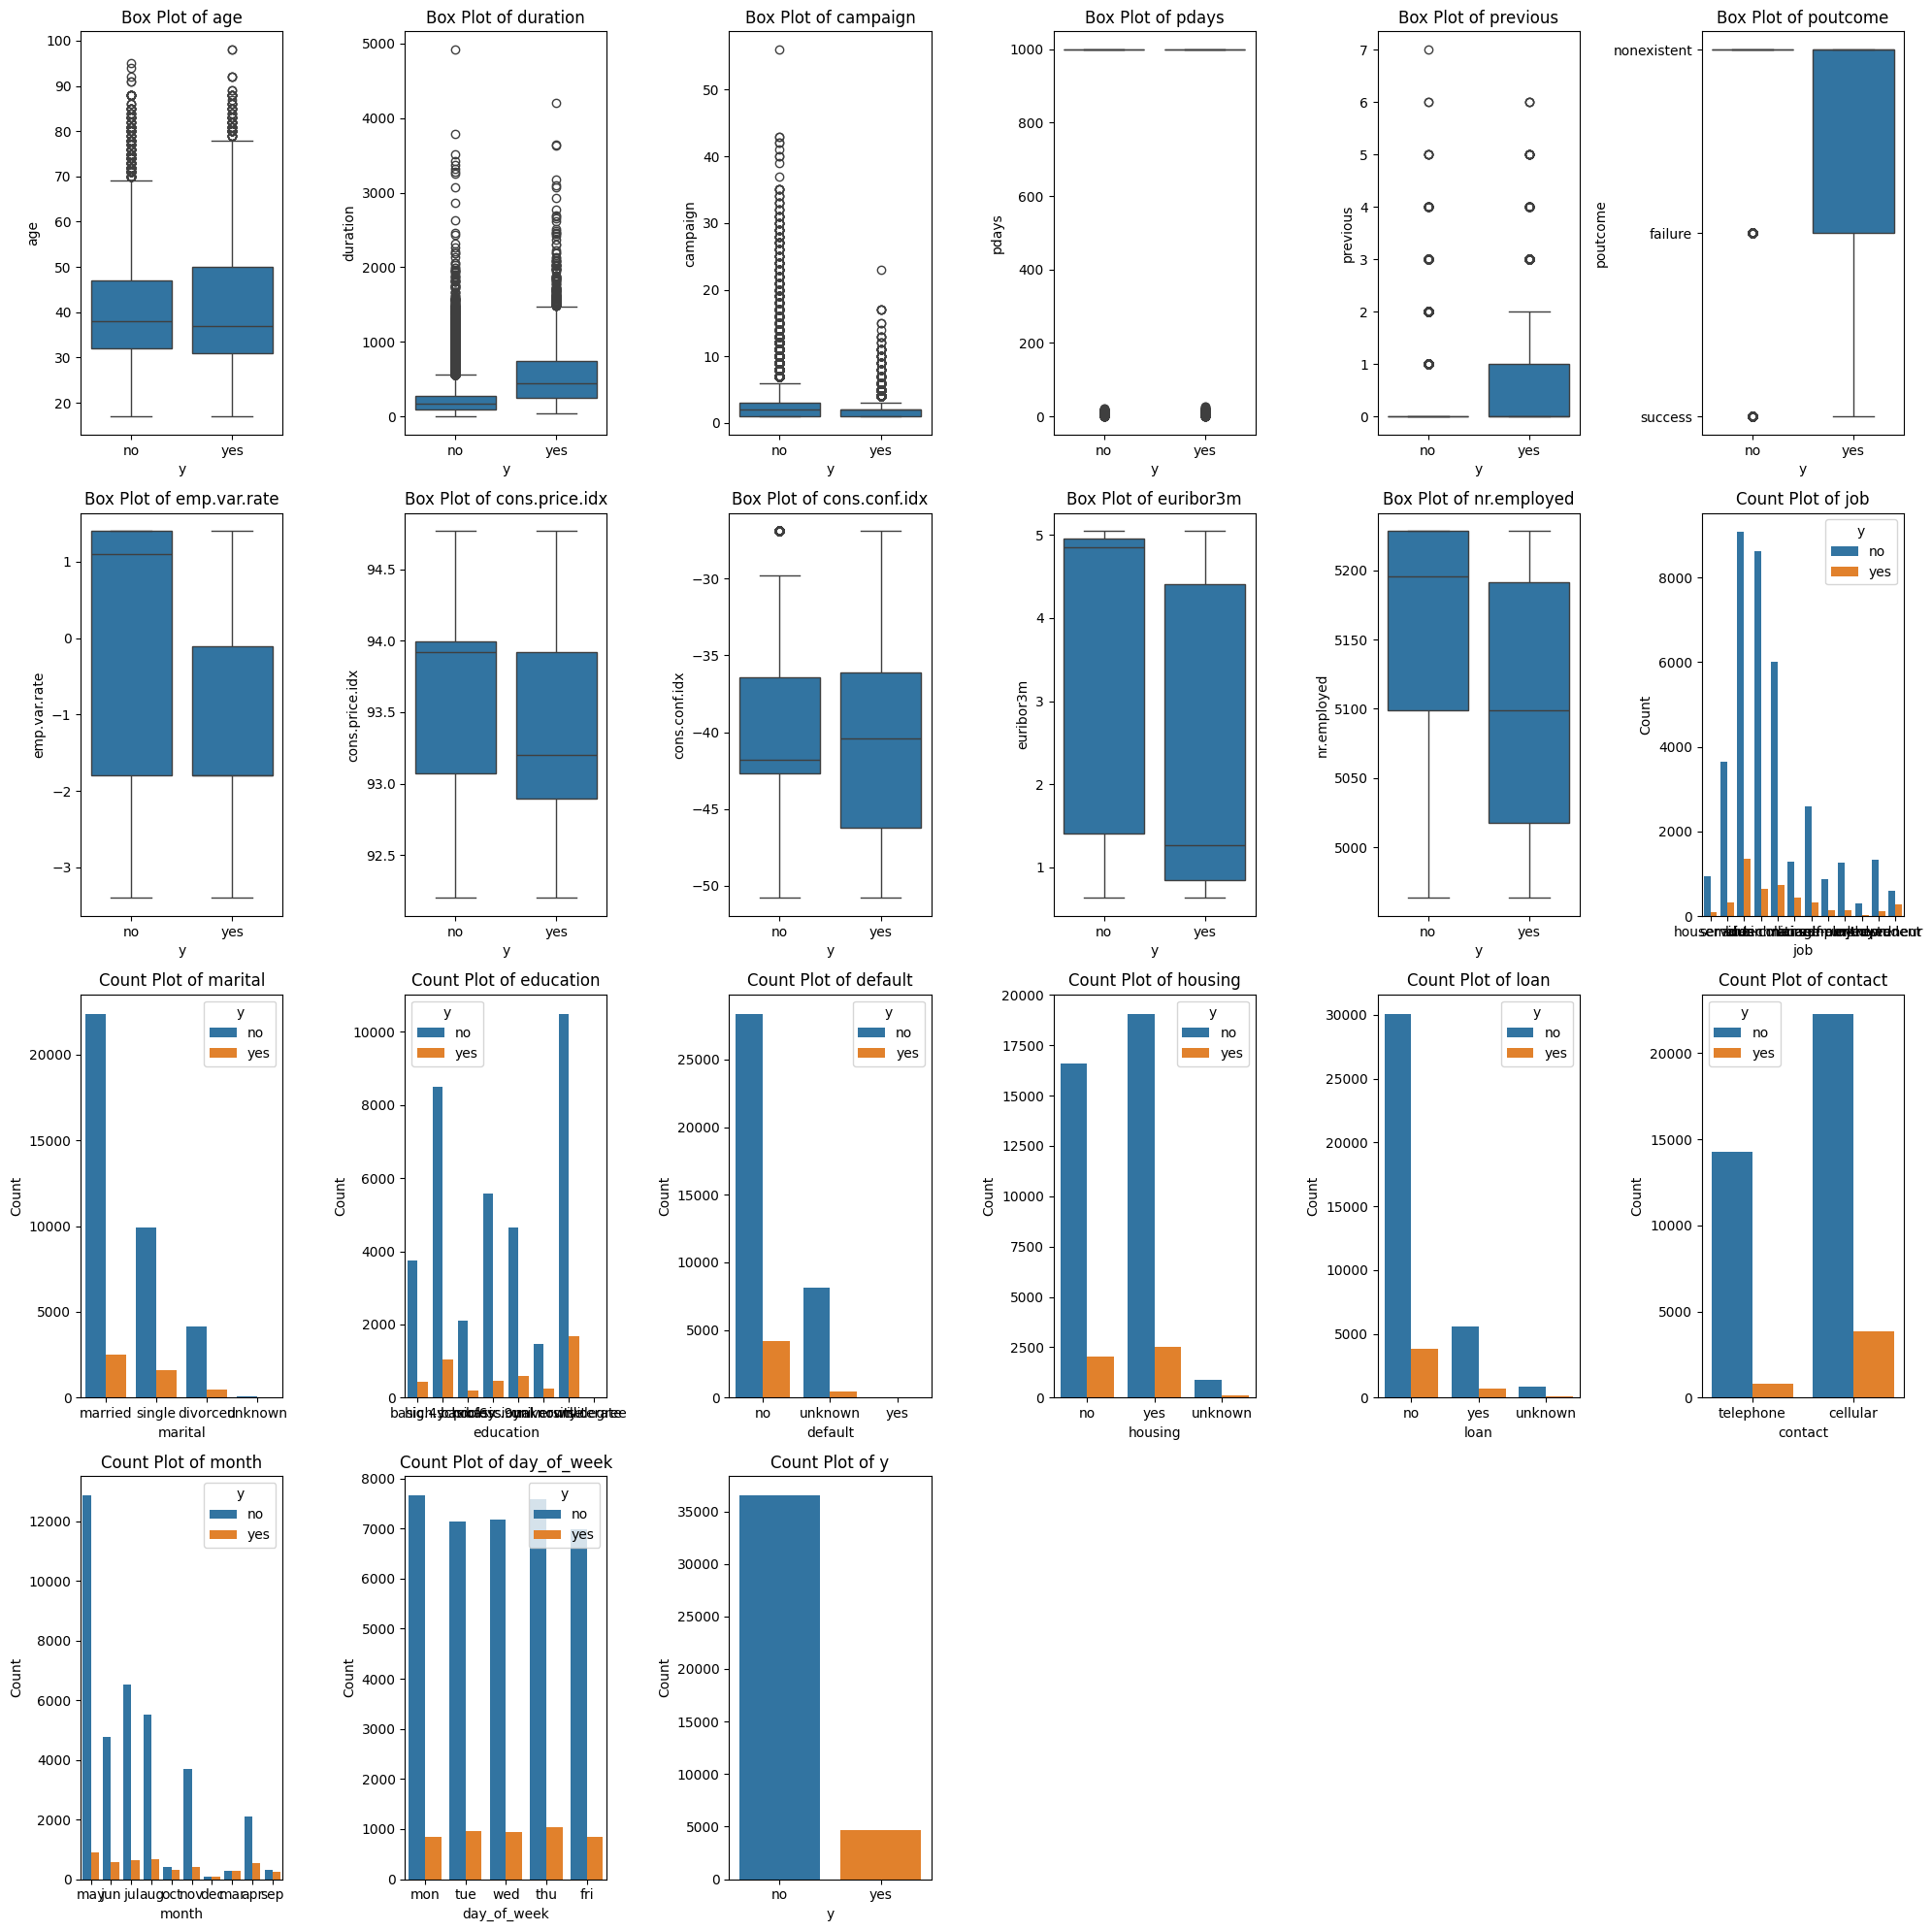

In [10]:
# Part 3 

# List of numerical and categorical columns
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' ,'nr.employed']

categorical_columns = ['job', 'marital', 'education', 'default', 
                       'housing', 'loan', 'contact', 'month', 'day_of_week', 'y']

# Combine the lists to get the total number of variables
all_columns = numerical_columns + categorical_columns
total_columns = len(all_columns)

# Determine grid size (e.g., 4 columns)
n_cols = 6
n_rows = (total_columns // n_cols) + (total_columns % n_cols > 0)

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create plots for each variable
for i, col in enumerate(all_columns):
    if col in numerical_columns:
        sns.boxplot(x='y', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_xlabel('y')
        axes[i].set_ylabel(col)
    else:
        sns.countplot(x=col, hue='y', data=df, ax=axes[i])
        axes[i].set_title(f'Count Plot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
# Part 3

# Convert categorical variables into numerical variables to understand relationship to churn for correlation analysis

df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 
                       'housing', 'loan', 'contact', 'month', 'day_of_week', 'y'], drop_first=False)

# Identify and convert boolean columns to integers
bool_columns = df_encoded.select_dtypes(include='bool').columns

df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

# df_encoded.head()
# df_encoded.info()

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   poutcome                       41188 non-null  object 
 6   emp.var.rate                   41188 non-null  float64
 7   cons.price.idx                 41188 non-null  float64
 8   cons.conf.idx                  41188 non-null  float64
 9   euribor3m                      41188 non-null  float64
 10  nr.employed                    41188 non-null  float64
 11  job_admin.                     41188 non-null  int64  
 12  job_blue-collar                41188 non-null 

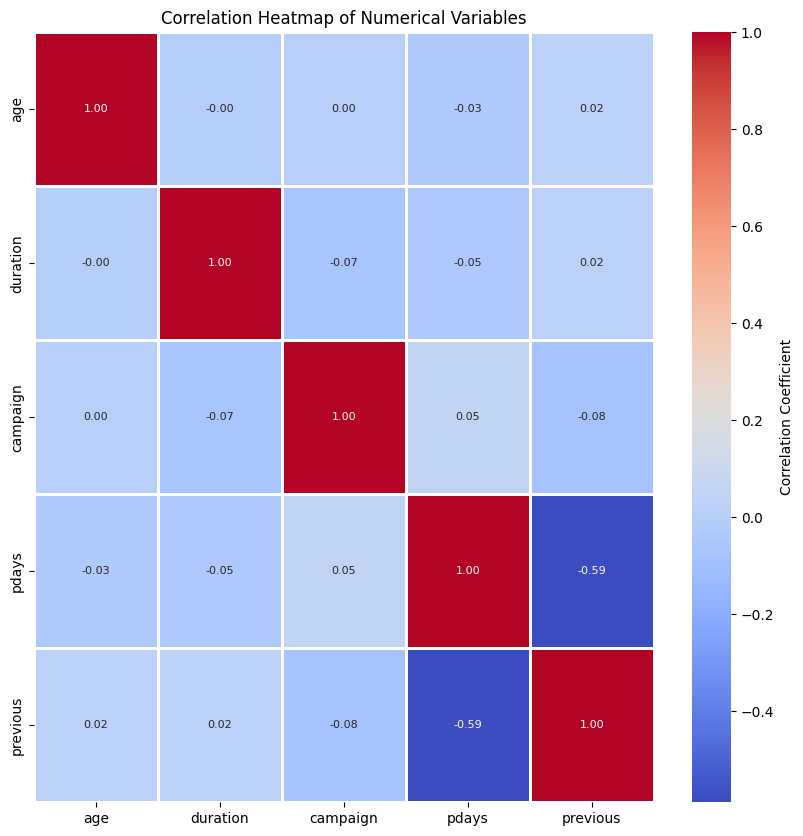

In [16]:
# Part 3: create heatmap and correlation chart 

# List of shortlisted columns
shortlist_columns = [#outcome variable used for prediction
                    #  'y_yes',
                     #Numerical variables from source file
                     'age', 'duration', 'campaign', 'pdays', 'previous'
                    #transformed variable from categories
                    # 'Geography_NSW', 'Geography_QLD', 'Geography_VIC','Gender_Female','Gender_Male',
                    # 'HasCrCard_0','HasCrCard_1','IsActiveMember_0','IsActiveMember_1','Complain_0','Complain_1',
                    # 'Card Type_DIAMOND', 'Card Type_GOLD','Card Type_PLATINUM','Card Type_SILVER'
                     ]


# Calculate the correlation matrix
correlation_matrix = df_encoded[shortlist_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",annot_kws={"size": 8}, cmap='coolwarm',
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=2)

# Set title and show the plot
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()




# Find pairs with correlation coefficient >= 0.8
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display the pairs and their R-squared values
for pair in high_corr_pairs:
    var1, var2, corr = pair
    r_squared = corr ** 2
    print(f"Variables: {var1} and {var2} have a correlation of {corr:.2f} and R-squared of {r_squared:.2f}")


In [18]:
# Part 1: Import libraries and dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent truncation